In [154]:
!pip install countryinfo
!pip install missingno
import pandas as pd
import numpy as np
import missingno as msno
import re
import math
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 16)
from datetime import date

In [155]:
conda install opencv 

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


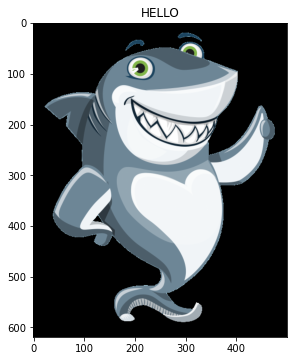

In [156]:
import cv2
binary = cv2.imread('kisspng.png')
binary.shape
plt.figure(figsize=[10,10])
plt.imshow(binary[:,:,::-1])
plt.subplot(122)
plt.imshow(binary[:,:,::-1])
plt.title("HELLO")
plt.show()

In [157]:
db = pd.read_csv('attacks.csv', encoding='cp1252')
len(db)

25723

## 1. First visualitation

In [158]:
db.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303,NaN,NaN
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302,NaN,NaN
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301,NaN,NaN
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300,NaN,NaN
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299,NaN,NaN


## 2. Drop duplicates rows

In [159]:
db.drop_duplicates()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303,NaN,NaN
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302,NaN,NaN
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301,NaN,NaN
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300,NaN,NaN
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309,NaN,NaN
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310,NaN,NaN
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Checking null data, how many empty cells there are in every column.

In [160]:
#True=1; suma los 1
null_cols = db.isnull().sum()
null_cols

Case Number       17021
Date              19421
Year              19423
Type              19425
Country           19471
                  ...  
Case Number.1     19421
Case Number.2     19421
original order    19414
Unnamed: 22       25722
Unnamed: 23       25721
Length: 24, dtype: int64

## 4. No duplicates, len remains the same (25,723)

In [161]:
len(db)

25723

## 5. Show columns of db that have NaN values

In [162]:
def null_cols(db):
    nulls = db.isna().sum()
    return nulls[nulls > 0] / len(db) * 100
null_cols(db)

Case Number        66
Date               76
Year               76
Type               76
Country            76
                 ... 
Case Number.1      76
Case Number.2      76
original order     75
Unnamed: 22       100
Unnamed: 23       100
Length: 24, dtype: float64

## 6. Deleting blank spaces

In [163]:
db.columns = db.columns.str.rstrip()
db['Sex']= db['Sex'].str.strip()
db['Country']= db['Country'].str.strip()
db['Age']= db['Age'].str.strip()
db['Case Number']= db['Case Number'].str.strip()
db['Fatal (Y/N)']= db['Fatal (Y/N)'].str.strip()
db

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303,NaN,NaN
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302,NaN,NaN
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301,NaN,NaN
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300,NaN,NaN
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 7. Check if 'Case Number' contains the same info as "Case Number.1" & "Case Number.2"

In [164]:
((db["Case Number"] == db["Case Number.1"]) & (db["Case Number"] == db["Case Number.2"])).value_counts()

False    19448
True      6275
dtype: int64

In [165]:
db=db[(db["Case Number"] == db["Case Number.1"]) & (db["Case Number"] == db["Case Number.2"])]
db

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303,NaN,NaN
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302,NaN,NaN
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301,NaN,NaN
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300,NaN,NaN
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6,NaN,NaN
6298,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5,NaN,NaN
6299,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4,NaN,NaN
6300,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3,NaN,NaN


In [166]:
db.reset_index()
db.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303,NaN,NaN
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302,NaN,NaN
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301,NaN,NaN
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300,NaN,NaN
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299,NaN,NaN


## 8. Unnamed: 22" and "Unnamed: 23" are mostly empty. Let's examine what they contain

In [167]:
db['Unnamed: 22'].fillna(0, inplace=True)
[x for x in db['Unnamed: 22'] if x!=0]

C:\Users\pinil\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


['stopped here']

In [168]:
db['Unnamed: 23'].fillna(0, inplace=True)
[y for y in db['Unnamed: 23'] if y!=0]

['Teramo', 'change filename']

### We will drop Unmamed:22, only contain 'stopped here'/ Unmamed:23, only contain 'Teramo' & 'change filename'

In [169]:
db.drop(columns = ["Unnamed: 22", "Unnamed: 23"], inplace = True)

C:\Users\pinil\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## 9. Let's check how many different values contain this two columns in order to drop one of them

In [170]:
(db["href formula"] != db["href"]).value_counts()

False    6216
True       59
dtype: int64

### Searching missing values in 'href formula' which is present in 'href':

In [171]:
((db["href formula"]).isna()).value_counts()

False    6274
True        1
Name: href formula, dtype: int64

In [172]:
((db["href"]).isnull()).value_counts()

False    6275
Name: href, dtype: int64

In [173]:
((db["href formula"] != db["href"]) & (db["href formula"]).isna()).value_counts()

False    6274
True        1
dtype: int64

### Dropping href

In [174]:
db.drop(columns = ["href"], inplace = True)

In [175]:
db[db['Case Number']==0]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,Case Number.1,Case Number.2,original order


## 10. ‘all’ : If all values are NaN, drop that row or column.

In [176]:
db = db.dropna(how='all')
len(db)
#db = db.dropna() dropea todo si algún valor es NaN

6275

## 11. Reindexing dataframe

In [177]:
db.reset_index(drop=True)
db.head(1)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303


## 12. Let's have a look to Age and Sex columns

In [178]:
print(db['Age'].dtypes)

object


### Checking NaN rows

In [179]:
NaN_rows_Age=db["Age"].isna().sum()
print('NaN rows Age:')
print(NaN_rows_Age)
null_rows_Age = db['Age'].isnull().sum()
print(null_rows_Age)
db.Age.dropna(inplace=True)

NaN rows Age:
2815
2815


In [180]:
db['Age'] = db['Age'].str.replace('X', '')
db['Age'] = db['Age'].str.replace('\xa0', '')
db['Age'] = db['Age'].str.replace('MAKE LINE GREEN', '')
db['Age'] = db['Age'].str.replace('F', '')
db['Age'] = db['Age'].str.replace('A.M.', '')

In [181]:
def replace(Age):
    try:
        return int(Age)
    except:
        return None    

In [182]:
db['Age']=db.Age.map(replace)

In [183]:
#Country mode = USA. we can use this average Age to fillin empty rows in Age
Country_age_mean=db.groupby(by='Country').Age.mean()
Country_age_mean['USA']

26.76659822039699

In [184]:
db['Age'] = db['Age'].fillna(Country_age_mean['USA'])

In [185]:
def replace(Age):
    try:
        return int(Age)
    except:
        return None    

In [186]:
db['Age']=db.Age.map(replace)

In [187]:
print(set(db['Age']))

{1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 81, 82, 84, 86, 87}


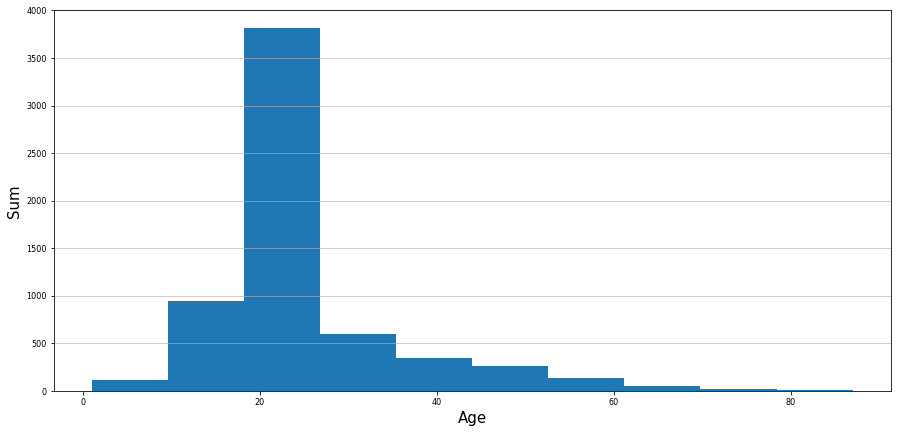

In [188]:
plt.figure(figsize=[15,7])
plt.hist(db['Age'])
plt.xticks(fontsize=8) 
plt.yticks(fontsize=8)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Sum',fontsize=15)
plt.grid(axis='y', alpha=0.75)

In [189]:
null_rows_Age = db['Age'].isnull().sum()
print(null_rows_Age)

0


In [190]:
db.describe(include = 'O').transpose()

,count,unique,top,freq
Case Number,6275,6259,1990.05.10,2
Date,6275,5409,1957,11
Type,6271,8,Unprovoked,4579
Country,6225,204,USA,2222
Area,5824,816,Florida,1035
...,...,...,...,...
Investigator or Source,6258,4955,"C. Moore, GSAF",100
pdf,6275,6264,1898.00.00.R-Syria.pdf,2
href formula,6274,6263,http://sharkattackfile.net/spreadsheets/pdf_di...,2
Case Number.1,6275,6259,1990.05.10,2


## Sex column

In [191]:
db[db['Sex']==0]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,Case Number.1,Case Number.2,original order


In [192]:
null_rows_Sex = db['Sex'].isnull().sum()
print(null_rows_Sex)

561


In [193]:
#Print set of different values
set(db['Sex'])

{'.', 'F', 'M', 'N', 'lli', nan}

In [194]:
db['Sex']=db['Sex'].replace(['.', 'lli', 'N'], 'U')
#db['Sex'] = db['Sex'].fillna('U')

In [195]:
set(db['Sex'])

{'F', 'M', 'U', nan}

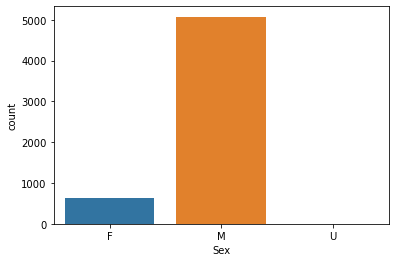

In [196]:
sns.countplot(x=db.Sex)

In [197]:
db[(db["Sex"] != db["Name"]) & (db["Sex"]).isna()]["Name"]

32                                                    NaN
59                                            31 migrants
86                                                    NaN
124                                                   NaN
154                                                   NaN
                              ...                        
6212    4.8-metre skiboat, Occupants: Rod Salm & 4 fri...
6237                                                  NaN
6259                                                   C.
6278                                                  NaN
6287                                           20 Fijians
Name: Name, Length: 561, dtype: object

In [198]:
set(db['Sex'])

{'F', 'M', 'U', nan}

## Fatal (Y/N)

In [199]:
set(db['Fatal (Y/N)'])

{'2017', 'M', 'N', 'UNKNOWN', 'Y', nan, 'y'}

In [200]:
db['Fatal (Y/N)'] = db['Fatal (Y/N)'].str.replace('y', 'Y')
db['Fatal (Y/N)']=db['Fatal (Y/N)'].replace(['2017','UNKNOWN','M'], 'U')
#db['Fatal (Y/N)'] = db['Fatal (Y/N)'].fillna('U')

In [201]:
# This is a list with the indexes of the rows which have NaN values in the column "Fatal"
rows_missing_FATAL = list(db[(db["Injury"].isna()== False) & (db["Fatal (Y/N)"].isna())].index)
len(rows_missing_FATAL)

528

In [202]:
def InjFatal (value):
    value=str(value)
    if "fatal" in value.lower():
        return True
    else:
        return False

In [203]:
db.Injury.map(InjFatal)

0       False
1       False
2       False
3       False
4       False
        ...  
6297     True
6298     True
6299     True
6300     True
6301     True
Name: Injury, Length: 6275, dtype: bool

In [204]:
db[~db['Injury'].map(InjFatal) & db["Fatal (Y/N)"].isnull()].loc[:,"Fatal (Y/N)"]="Y"
db

C:\Users\pinil\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,26,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,26,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,26,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6
6298,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,26,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5
6299,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,26,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4
6300,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,26,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3


In [205]:
db[db['Injury'].map(InjFatal) & db["Fatal (Y/N)"].isnull()]["Fatal (Y/N)"]="Y"
db

<ipython-input-205-1a52710b66d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db[db['Injury'].map(InjFatal) & db["Fatal (Y/N)"].isnull()]["Fatal (Y/N)"]="Y"


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,26,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,26,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,26,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6
6298,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,26,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5
6299,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,26,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4
6300,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,26,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3


In [206]:
#if db.Injury.map(InjFatal)==True and db["Fatal (Y/N)"]==None:
    #db["Fatal (Y/N)"]="Y"
#elif db["Fatal (Y/N)"]==None:
    #db["Fatal (Y/N)"]="N"       

In [207]:
db.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,26,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,26,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299


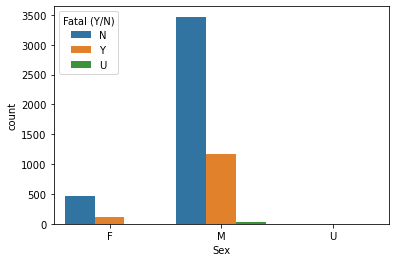

In [208]:
ax = sns.countplot(x="Sex", hue="Fatal (Y/N)", data=db)

## Type

In [209]:
set(db['Type'])

{'Boat',
 'Boating',
 'Boatomg',
 'Invalid',
 'Provoked',
 'Questionable',
 'Sea Disaster',
 'Unprovoked',
 nan}

In [210]:
db['Type'] = db['Type'].fillna('Not confirmed')
db['Type'] = db['Type'].str.replace('Boating', 'Boat')
db['Type'] = db['Type'].str.replace('Boatomg', 'Boat')
db['Type'] = db['Type'].str.replace('Invalid', 'Not confirmed')
db['Type'] = db['Type'].str.replace('Questionable', 'Not confirmed')

In [211]:
set(db['Type'])

{'Boat', 'Not confirmed', 'Provoked', 'Sea Disaster', 'Unprovoked'}

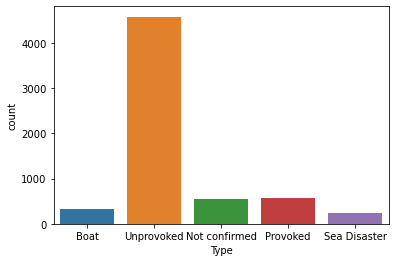

In [212]:
ax = sns.countplot(x="Type", data=db)

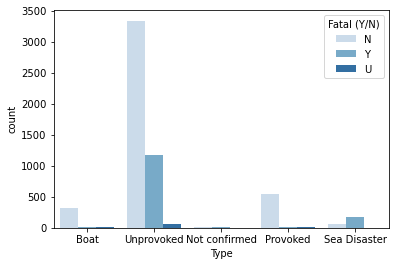

In [213]:
sns.countplot(x=db.Type,
              hue=db['Fatal (Y/N)'],
              palette="Blues")

## . Country

In [214]:
set(db['Country'])

{'ADMIRALTY ISLANDS',
 'AFRICA',
 'ALGERIA',
 'AMERICAN SAMOA',
 'ANDAMAN / NICOBAR ISLANDAS',
 'ANDAMAN ISLANDS',
 'ANGOLA',
 'ANTIGUA',
 'ARGENTINA',
 'ARUBA',
 'ASIA?',
 'ATLANTIC OCEAN',
 'AUSTRALIA',
 'AZORES',
 'BAHAMAS',
 'BAHREIN',
 'BANGLADESH',
 'BARBADOS',
 'BAY OF BENGAL',
 'BELIZE',
 'BERMUDA',
 'BRAZIL',
 'BRITISH ISLES',
 'BRITISH NEW GUINEA',
 'BRITISH VIRGIN ISLANDS',
 'BRITISH WEST INDIES',
 'BURMA',
 'Between PORTUGAL & INDIA',
 'CANADA',
 'CAPE VERDE',
 'CARIBBEAN SEA',
 'CAYMAN ISLANDS',
 'CENTRAL PACIFIC',
 'CEYLON',
 'CEYLON (SRI LANKA)',
 'CHILE',
 'CHINA',
 'COLUMBIA',
 'COMOROS',
 'COOK ISLANDS',
 'COSTA RICA',
 'CRETE',
 'CROATIA',
 'CUBA',
 'CURACAO',
 'CYPRUS',
 'Coast of AFRICA',
 'DIEGO GARCIA',
 'DJIBOUTI',
 'DOMINICAN REPUBLIC',
 'ECUADOR',
 'EGYPT',
 'EGYPT / ISRAEL',
 'EL SALVADOR',
 'ENGLAND',
 'EQUATORIAL GUINEA / CAMEROON',
 'FALKLAND ISLANDS',
 'FEDERATED STATES OF MICRONESIA',
 'FIJI',
 'FRANCE',
 'FRENCH POLYNESIA',
 'Fiji',
 'GABON',
 'GEORGIA'

In [215]:
db['Country']=db['Country'].replace(['MALDIVAS'],'MALDIVES')
db['Country']=db['Country'].replace(['INDIAN OCEAN?'],'INDIAN OCEAN')
db['Country']=db['Country'].replace(['ANDAMAN / NICOBAR ISLANDAS'], 'ANDAMAN ISLANDS')
db['Country']=db['Country'].replace(['Fiji'], 'FIJI')
db['Country']=db['Country'].replace(['RED SEA?','READ SEA / INDIAN OCEAN'], 'READ SEA')
db['Country']=db['Country'].replace(['ST. MAARTIN'], 'ST. MARTIN')
db['Country']=db['Country'].replace(['SUDAN?'], 'SUDAN')
db['Country']=db['Country'].replace(['UNITED ARAB EMIRATES (UAE)'], 'UNITED ARAB EMIRATES')
db['Country']=db['Country'].replace(['WESTERN SAMOA'], 'SAMOA')
db['Country']=db['Country'].replace(['TOBAGO'], 'TRINIDAD & TOBAGO')
db['Country']=db['Country'].replace(['SOLOMON ISLANDS / VANUATU'], 'SOLOMON ISLANDS')
db['Country']=db['Country'].replace(['ST HELENA, British overseas territory'], 'ST HELENA')
db['Country']=db['Country'].replace(['MALDIVE ISLANDS'], 'MALDIVAS')
db['Country']=db['Country'].replace(['READ SEA','RED SEA / INDIAN OCEAN'], 'RED SEA')
db['Country']=db['Country'].replace(['Coast of AFRICA'], 'AFRICA')
db['Country']=db['Country'].replace(['France'], 'FRANCE')
db['Country']=db['Country'].replace(['Mozambique'], 'MOZAMBIQUE')
db['Country']=db['Country'].replace(['REUNION ISLAND'], 'REUNION')

In [216]:
Countries_max=db.Country.value_counts()
Countries_max.head(15)

USA                 2222
AUSTRALIA           1335
SOUTH AFRICA         577
PAPUA NEW GUINEA     134
NEW ZEALAND          128
BRAZIL               111
BAHAMAS              109
MEXICO                88
ITALY                 68
FIJI                  65
PHILIPPINES           62
REUNION               61
NEW CALEDONIA         53
CUBA                  46
MOZAMBIQUE            44
Name: Country, dtype: int64

In [217]:
db[(db.Country.isna()) & (db.Area.isna()== False) & (db.Location.isna()==False)][["Country", "Area", "Location"]]

,Country,Area,Location
3387,NaN,Caribbean Sea,Between St. Kitts & Nevis
4266,NaN,Between Comores & Madagascar,Geyser Bank
4498,NaN,Caribbean Sea,Between Cuba & Costa Rica
5020,NaN,French Southern Territories,Île Saint-Paul
6137,NaN,St Helena,Landing Place


In [218]:
rows_missing_Countries = list(db[(db.Country.isna()) & (db.Area.isna()== False) & (db.Location.isna()==False)].index)
rows_missing_Countries

[3387, 4266, 4498, 5020, 6137]

In [219]:
input_Countries= ["Saint Kitts and Nevis", "Mozambique", "Cuba", "France", "ST HELENA"]

In [220]:
def filling(data, indexes, values, col_name):
    j=0
    for i in indexes:   
        db.at[ i, col_name] = values[j]
        j = j+1

In [221]:
filling(db, rows_missing_Countries, input_Countries, "Country")

In [222]:
db[(db.Country.isna()) & (db.Area.isna()== False) & (db.Location.isna()==False)][["Country", "Area", "Location"]]

,Country,Area,Location


In [223]:
db[(db.Country.isna()) & (db.Area.isna()) & (db.Location.isna()==False)][["Country", "Area", "Location"]]


,Country,Area,Location
3605,NaN,NaN,Florida Strait
4639,NaN,NaN,225 miles east of Hong Kong
5425,NaN,NaN,Near the equator
5810,NaN,NaN,Santa Cruz
6155,NaN,NaN,Carlisle Bay
6206,NaN,NaN,In a river feeding into the Bay of Bengal


In [224]:
rows_missing_Countries2 = list(db[(db.Country.isna()) & (db.Area.isna()) & (db.Location.isna()==False)].index)
rows_missing_Countries2

[3605, 4639, 5425, 5810, 6155, 6206]

In [225]:
input_Countries2= ["USA", "CHINA", " ", "USA", "ANTIGUA", "INDIA"]
filling(db, rows_missing_Countries2, input_Countries2, "Country")
db[(db.Country.isna()) & (db.Area.isna()== False) & (db.Location.isna()==False)][["Country", "Area", "Location"]]

,Country,Area,Location


In [226]:
db[(db.Country.isna()) & (db.Area.isna()==False) & (db.Location.isna())][["Country", "Area", "Location"]]

,Country,Area,Location
2956,NaN,English Channel,NaN
4018,NaN,"Between Timor & Darwin, Australia",NaN
4231,NaN,Near the Andaman & Nicobar Islands,NaN
4700,NaN,Off South American coast,NaN
4712,NaN,300 miles east of St. Thomas (Virgin Islands),NaN
5612,NaN,Mediterranean Sea,NaN
5742,NaN,Gulf of California,NaN
5808,NaN,Western Banks,NaN
6175,NaN,Ionian Sea,NaN
6177,NaN,Ionian Sea,NaN


In [227]:
rows_missing_Countries3 = list(db[(db.Country.isna()) & (db.Area.isna()==False) & (db.Location.isna())].index)
rows_missing_Countries3

[2956, 4018, 4231, 4700, 4712, 5612, 5742, 5808, 6175, 6177]

In [228]:
input_Countries3= ["", "AUSTRALIA", "INDIA","USA","VIRGIN ISLANDS","SPAIN", "USA","","SICILIA","SICILIA"]
filling(db, rows_missing_Countries3, input_Countries3, "Country")
db[(db.Country.isna()) & (db.Area.isna()==False) & (db.Location.isna())][["Country", "Area", "Location"]]

,Country,Area,Location


In [229]:
null_cols(db['Country'])

array([0.46215139])

In [230]:
rows_missing_Countries = list(db[(db.Country.isna()) & (db.Area.isna()== False) & (db.Location.isna()==False)].index)
rows_missing_Countries

[]

## Date

In [231]:
print(set(db['Date']))

{'2003?', '22-Mar-1918', 'Reported 06-Nov-1937', 'Reported 26-Aug-1934', '10-Aug-1932', '01-Jul-1916', '25-Feb-2017', '04-Apr-2004', '05-Mar-1964', '26-Jan-1962', '29-Jan-1992', '1839/1840', '12-Feb-1847', '18-Apr-2002', 'Reported 06-Jun-1948', '04-Nov-2012', '08-Jul-2012', '05-Jun-1988', 'Reported 26-Sep-1930', '08-Ap-1936', '09-Mar-1935', 'Jan-Jun-1962', '26-Jan-1926', '25-Jun-1951', '19-Mar-2005', '19-Dec-2016', '25-May-2005', '28-Jun-1956', '1898-1899', '30-Nov-2010', '23-Aug-1858', '26-Apr-2011', '14-Jun-1959', '09-Mar-1967', '20-Jul-1962', 'Reported 18-Mar-1999 ', '03-Apr-2006', '29-Nov-1891', 'Sep-2003', '03-May-2015', '01-Jul-2015', '30-Dec-2008', '13-May-1949', 'Jun-1967', '19-Dec-1959', '02-Jan-1993', '22-Dec-1986', 'May 1982', '12-Apr-1939', '22-Apr-1969', 'Reported 19-Mar-1953', '24-Jun-2008', '26-Feb-1977', '25-Nov-2008', '09-Oct-1961', 'Aug-24-1806', '15-Aug-1967', '20-Oct-2011', '04-Oct-1939', '10-Mar-1984', 'Oct-1986', '24-Jun-1892', '01-Sep-2015', '06-Nov-1892', '23-Se

In [105]:
db['Case Number'].sample(n=20)

1400    2007.03.05.R
3080    1980.00.00.c
6144    1776.00.00.R
2348    1995.08.31.a
3289      1973.12.00
            ...     
2751      1988.02.02
2032    2000.07.16.a
712       2012.12.31
3435      1969.05.14
4519      1949.01.14
Name: Case Number, Length: 20, dtype: object

In [232]:
print(db['Date'].dtypes)

object


In [233]:
try:
    db['Year_']=[d[0:4] for d in db['Case Number']]
except:
    db['Year_']='00'
try:
    db['Month']=[d[5:7] for d in db['Case Number']]
except:
    db['Month']='00'
try:
    db['Day']=[d[8:10] for d in db['Case Number']]
except:
    db['Day']='00'

In [234]:
db['Year_'].sample(n=20)

4455    1950
3511    1967
791     2012
4863    1936
2918    1983
        ... 
240     2016
844     2011
1988    2000
3435    1969
585     2014
Name: Year_, Length: 20, dtype: object

In [235]:
db['Month'].sample(n=20)

823     01
5745    02
463     12
1839    08
2779    05
        ..
5962    00
817     02
4632    12
2156    10
4300    03
Name: Month, Length: 20, dtype: object

In [236]:
db['Day'].sample(n=20)

6221      
2067    09
2226    06
3318    01
4162    19
        ..
6297      
3418    05
2259    28
414     13
1579    13
Name: Day, Length: 20, dtype: object

In [237]:
db[['Year','Year_']].sample(n=20)

,Year,Year_
3497,1967,1967
4585,1947,1947
6028,1850,1850
51,2018,2018
4207,1957,1957
...,...,...
3691,1964,1964
4095,1959,1959
5682,1892,1892
1139,2009,2009


In [238]:
pd.set_option('precision', 0)

In [239]:
print(set(db['Year_']))

{'1803', '1959', '2006', '1851', '1937', '1953', '2001', '1860', '1819', '1771', '2010', '1812', '1944', '1864', '1638', '1956', '1861', 'ND-0', '1749', '1700', '2007', '2018', '0000', '1818', '1831', '1817', '1595', '1841', '1836', '1980', '1869', '1703', '1914', '0500', '1881', '1751', '1767', '1943', '1905', '1931', '1936', '1780', '1947', '1894', '1784', '1920', '1555', '1961', '2009', '1902', '1863', '1873', '2004', '1868', '1969', '2000', '1934', '1806', '1800', '1723', '1835', '1786', '1776', '1753', '1998', '1906', '1997', '1958', '1834', '1904', '1804', '1816', '1984', '1966', '1912', '1842', '1580', '1899', '1962', '1871', '1857', '1758', '1867', '1876', '1852', '1919', '1878', '0005', '1875', '1846', '1976', '1801', '1926', '1992', '1889', '1877', '1840', '1892', '1898', '1982', '2005', '1941', '1848', '1855', '1543', '1929', '1901', '1742', '1853', '1968', '1925', '1883', '1810', '1783', '1845', '1938', '1859', '1642', '1807', '1923', '1884', '1802', '1935', '1963', '1890',

In [240]:
db.loc[db['Year_'].str.contains('(?i)ND'),'Year_']='00'

In [241]:
print(set(db['Year_']))

{'1803', '1959', '2006', '1851', '1937', '1953', '2001', '1860', '1819', '1771', '2010', '1812', '1944', '1864', '1638', '1956', '1861', '1749', '1700', '2007', '2018', '0000', '1818', '1831', '1817', '1595', '1841', '1836', '1980', '1869', '1703', '1914', '0500', '1881', '1751', '1767', '1943', '1905', '1931', '1936', '1780', '1947', '1894', '1784', '1920', '00', '1555', '1961', '2009', '1902', '1863', '1873', '2004', '1868', '1969', '2000', '1934', '1806', '1800', '1723', '1835', '1786', '1776', '1753', '1998', '1906', '1997', '1958', '1834', '1904', '1804', '1816', '1984', '1966', '1912', '1842', '1580', '1899', '1962', '1871', '1857', '1758', '1867', '1876', '1852', '1919', '1878', '0005', '1875', '1846', '1976', '1801', '1926', '1992', '1889', '1877', '1840', '1892', '1898', '1982', '2005', '1941', '1848', '1855', '1543', '1929', '1901', '1742', '1853', '1968', '1925', '1883', '1810', '1783', '1845', '1938', '1859', '1642', '1807', '1923', '1884', '1802', '1935', '1963', '1890', '

In [242]:
db['test'] = db['Year_']==(db['Year'])
db['test'].value_counts()

False    6275
Name: test, dtype: int64

In [243]:
db.loc[db['Year_']!=(db['Year'])]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,Case Number.1,Case Number.2,original order,Year_,Month,Day,test
0,2018.06.25,25-Jun-2018,2018,Boat,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303,2018,06,25,False
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302,2018,06,18,False
2,2018.06.09,09-Jun-2018,2018,Not confirmed,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301,2018,06,09,False
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,26,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300,2018,06,08,False
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,26,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299,2018,06,04,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,26,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6,00,05,,False
6298,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,26,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5,00,04,,False
6299,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,26,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4,00,03,,False
6300,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,26,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3,00,02,,False


In [244]:
db[['Year','Year_']].sample(n=200)

,Year,Year_
1949,2001,2001
5696,1890,1890
1144,2009,2009
2635,1990,1990
38,2018,2018
...,...,...
495,2014,2014
2086,1999,1999
5158,1926,1926
2495,1993,1993


### Not the same but it could works

In [245]:
len(db['Year'])

6275

In [246]:
len(db['Year_'])

6275

In [247]:
print(db['Year'].dtypes)

float64


In [248]:
print(db['Year_'].dtypes)

object


In [249]:
len(db[db['Year']==0])

125

In [250]:
len(db[db['Year_']==0])

0

### We choose "Year_"

In [251]:
db ['Year_'] = db ['Year_'].astype(int)

In [292]:
len(db[db['Year_']>1980])

2068

In [293]:
db=db[db['Year_']>=1980]
db

,Activity,Age,Area,Case Number,Case Number.1,Case Number.2,Country,Date,Day,Decada,Decade,Fatal (Y/N),Injury,Investigator or Source,Location,Month,Name,Sex,Species,Time,Type,Year,Year_,href formula,original order,pdf,test
0,Paddling,57,California,2018.06.25,2018.06.25,2018.06.25,USA,25-Jun-2018,25,2010,2010,N,"No injury to occupant, outrigger canoe and pad...","R. Collier, GSAF","Oceanside, San Diego County",06,Julie Wolfe,F,White shark,18h00,Boat,2018,2018,http://sharkattackfile.net/spreadsheets/pdf_di...,6303,2018.06.25-Wolfe.pdf,False
1,Standing,11,Georgia,2018.06.18,2018.06.18,2018.06.18,USA,18-Jun-2018,18,2010,2010,N,Minor injury to left thigh,"K.McMurray, TrackingSharks.com","St. Simon Island, Glynn County",06,Adyson McNeely,F,NaN,14h00 -15h00,Unprovoked,2018,2018,http://sharkattackfile.net/spreadsheets/pdf_di...,6302,2018.06.18-McNeely.pdf,False
2,Surfing,48,Hawaii,2018.06.09,2018.06.09,2018.06.09,USA,09-Jun-2018,09,2010,2010,N,Injury to left lower leg from surfboard skeg,"K.McMurray, TrackingSharks.com","Habush, Oahu",06,John Denges,M,NaN,07h45,Not confirmed,2018,2018,http://sharkattackfile.net/spreadsheets/pdf_di...,6301,2018.06.09-Denges.pdf,False
3,Surfing,26,New South Wales,2018.06.08,2018.06.08,2018.06.08,AUSTRALIA,08-Jun-2018,08,2010,2010,N,Minor injury to lower leg,"B. Myatt, GSAF",Arrawarra Headland,06,male,M,2 m shark,NaN,Unprovoked,2018,2018,http://sharkattackfile.net/spreadsheets/pdf_di...,6300,2018.06.08-Arrawarra.pdf,False
4,Free diving,26,Colima,2018.06.04,2018.06.04,2018.06.04,MEXICO,04-Jun-2018,04,2010,2010,N,Lacerations to leg & hand shark PROVOKED INCIDENT,A .Kipper,La Ticla,06,Gustavo Ramos,M,"Tiger shark, 3m",NaN,Provoked,2018,2018,http://sharkattackfile.net/spreadsheets/pdf_di...,6299,2018.06.04-Ramos.pdf,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,Surfing,12,South Island,2000.02.03,2000.02.03,2000.02.03,NEW ZEALAND,03-Feb-2000,03,1980,1980,N,"No injury, wetsuit punctured","Waikato Times; Southland Times, 10/23/1999, p.1",Oreti Beach (reported as the 4th person bitten...,02,Michael Petas,M,NaN,NaN,Unprovoked,2000,2000,http://sharkattackfile.net/spreadsheets/pdf_di...,4229,2000.02.03-Petas.pdf,False
2075,Surfing,26,South Australia,2000.02.01,2000.02.01,2000.02.01,AUSTRALIA,01-Feb-2000,01,1980,1980,N,Hand bitten,"T. Peake, GSAF","Point Sinclair, Cactus Beach near Penong",02,Anthony Hayes,M,3 m [10'] shark,NaN,Unprovoked,2000,2000,http://sharkattackfile.net/spreadsheets/pdf_di...,4228,2000.02.01-Hayes.pdf,False
2076,Canoe with 3 men onboard sank,26,NaN,2000.01.28.R,2000.01.28.R,2000.01.28.R,REUNION,Reported 28-Jan-2000,28,1980,1980,Y,FATAL,B.L. du Vendre,Saint Pierre,01,Boulabhaï Ishmael,M,NaN,NaN,Boat,2000,2000,http://sharkattackfile.net/spreadsheets/pdf_di...,4227,2000.01.28.R-Reunion.pdf,False
2077,Diving,35,Phang nga Province,2000.01.05,2000.01.05,2000.01.05,THAILAND,05-Jan-2000,05,1980,1980,Y,FATAL,A. Xuereb,Phang nga Island,01,Stephan Kahl,M,NaN,NaN,Unprovoked,2000,2000,http://sharkattackfile.net/spreadsheets/pdf_di...,4226,2000.01.05-Kahl.pdf,False


In [294]:
db = db.reindex(columns=sorted(db.columns))

In [295]:
db.sort_values(by='Year',ascending=True)

,Activity,Age,Area,Case Number,Case Number.1,Case Number.2,Country,Date,Day,Decada,Decade,Fatal (Y/N),Injury,Investigator or Source,Location,Month,Name,Sex,Species,Time,Type,Year,Year_,href formula,original order,pdf,test
2078,Fishing for tarpon,26,Florida,2000.00.00,2000.00.00,2000.00.00,USA,2000,00,1980,1980,N,No injury to occupant; shark bit propeller,"B. Stout, News-Press, 7/2/2005","Boca Grande, Lee County",00,"boat: occupant, Terry Winters",M,Hammerhead shark,NaN,Boat,2000,2000,http://sharkattackfile.net/spreadsheets/pdf_di...,4225,2000.00.00-BocaGrandeBoat.pdf,False
2007,Surfing,31,Miyako Island,2000.09.16.b,2000.09.16.b,2000.09.16.b,OKINAWA,16-Sep-2000,16,1980,1980,Y,FATAL,M. Shimbun; japanupdate.com,Sunayama Beach,09,Takayuki Miura,M,"White shark, 2.5 m",17h00,Unprovoked,2000,2000,http://sharkattackfile.net/spreadsheets/pdf_di...,4296,2000.09.16.b-Miura.pdf,False
2008,NaN,26,South Carolina,2000.09.16.a,2000.09.16.a,2000.09.16.a,USA,16-Sep-2000,16,1980,1980,N,Non-fatal,"C. Creswell, GSAF","Isle of Palms, Charleston County",09,NaN,NaN,NaN,NaN,Unprovoked,2000,2000,http://sharkattackfile.net/spreadsheets/pdf_di...,4295,2000.09.16.a-NV-IsleOfPalms.pdf,False
2009,Standing / surfing,49,Florida,2000.09.15,2000.09.15,2000.09.15,USA,15-Sep-2000,15,1980,1980,N,Right lower leg & ankle lacerated,"SharkSurvivor.com.; The Stuart (FL) News, 9/19...","Fort Pierce Inlet, St Lucie County",09,Gary Smith,M,NaN,18h00,Unprovoked,2000,2000,http://sharkattackfile.net/spreadsheets/pdf_di...,4294,2000.09.15-Smith.pdf,False
2010,Surfing,26,Florida,2000.09.12,2000.09.12,2000.09.12,USA,12-Sep-2000,12,1980,1980,N,Puncture wounds on knee,"SharkSurvivor.com; Florida Today, 9/13/2000","Sebastian Inlet, Indian River or Brevard County",09,Brenda Fried,F,NaN,12h00,Unprovoked,2000,2000,http://sharkattackfile.net/spreadsheets/pdf_di...,4293,2000.09.12-Fried.pdf,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,Surfing,37,Western Australia,2018.04.15.a,2018.04.15.a,2018.04.15.a,AUSTRALIA,15-Apr-2018,15,2010,2010,N,Lacerations to legs,"B.Myatt, GSAF","Cobblestones, Margaret River Area",04,Alejandro Travaglini,M,NaN,08h00,Unprovoked,2018,2018,http://sharkattackfile.net/spreadsheets/pdf_di...,6274,2018.04.15.a-Travaglini.pdf,False
28,Surfing,41,Western Australia,2018.04.15.b,2018.04.15.b,2018.04.15.b,AUSTRALIA,15-Apr-2018,15,2010,2010,N,Laceration to right thigh,"B.Myatt, GSAF","Lefthanders, Margaret River Area",04,Jason Longrass,M,NaN,NaN,Unprovoked,2018,2018,http://sharkattackfile.net/spreadsheets/pdf_di...,6275,2018.04.15.b-Longrass.pdf,False
26,Swimming,54,Hua Hin,2018.04.15.d,2018.04.15.d,2018.04.15.d,THAILAND,15-Apr-2018,15,2010,2010,N,Lacerations to foot and ankle,"Straits Times, 4/16/2018",Sai Noi Beach,04,Werner Danielsen,M,Juvenile bull shark,NaN,Unprovoked,2018,2018,http://sharkattackfile.net/spreadsheets/pdf_di...,6277,2018.04.15.d-Thailand.pdf,False
0,Paddling,57,California,2018.06.25,2018.06.25,2018.06.25,USA,25-Jun-2018,25,2010,2010,N,"No injury to occupant, outrigger canoe and pad...","R. Collier, GSAF","Oceanside, San Diego County",06,Julie Wolfe,F,White shark,18h00,Boat,2018,2018,http://sharkattackfile.net/spreadsheets/pdf_di...,6303,2018.06.25-Wolfe.pdf,False


In [296]:
db.head(3)

,Activity,Age,Area,Case Number,Case Number.1,Case Number.2,Country,Date,Day,Decada,Decade,Fatal (Y/N),Injury,Investigator or Source,Location,Month,Name,Sex,Species,Time,Type,Year,Year_,href formula,original order,pdf,test
0,Paddling,57,California,2018.06.25,2018.06.25,2018.06.25,USA,25-Jun-2018,25,2010,2010,N,"No injury to occupant, outrigger canoe and pad...","R. Collier, GSAF","Oceanside, San Diego County",06,Julie Wolfe,F,White shark,18h00,Boat,2018,2018,http://sharkattackfile.net/spreadsheets/pdf_di...,6303,2018.06.25-Wolfe.pdf,False
1,Standing,11,Georgia,2018.06.18,2018.06.18,2018.06.18,USA,18-Jun-2018,18,2010,2010,N,Minor injury to left thigh,"K.McMurray, TrackingSharks.com","St. Simon Island, Glynn County",06,Adyson McNeely,F,NaN,14h00 -15h00,Unprovoked,2018,2018,http://sharkattackfile.net/spreadsheets/pdf_di...,6302,2018.06.18-McNeely.pdf,False
2,Surfing,48,Hawaii,2018.06.09,2018.06.09,2018.06.09,USA,09-Jun-2018,09,2010,2010,N,Injury to left lower leg from surfboard skeg,"K.McMurray, TrackingSharks.com","Habush, Oahu",06,John Denges,M,NaN,07h45,Not confirmed,2018,2018,http://sharkattackfile.net/spreadsheets/pdf_di...,6301,2018.06.09-Denges.pdf,False


In [297]:
db.isnull().sum()

Activity          91
Age                0
Area              90
Case Number        0
Case Number.1      0
                  ..
Year_              0
href formula       0
original order     0
pdf                0
test               0
Length: 27, dtype: int64

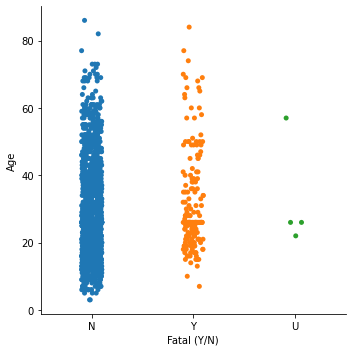

In [298]:
sns.catplot(x="Fatal (Y/N)", y="Age", data=db)

### aplicar un método básico estadístico de pandas como .sum(), .count(), .max(), .min(), .mean(), .median() o .mode()

In [299]:
db.groupby(['Country', 'Area']).count()

Activity  Age  Case Number  \
Country        Area                                                            
ANTIGUA        St John's                                 1    1            1   
ATLANTIC OCEAN 300 miles from Antigua                    1    1            1   
               600 nm west of the Canary Islands         1    1            1   
               800 miles from land                       1    1            1   
AUSTRALIA      New South Wales                         154  157          157   
...                                                    ...  ...          ...   
VANUATU        Malampa Province                          2    2            2   
VENEZUELA      Anzoategui                                2    2            2   
               Nueva Esparta                             1    1            1   
VIETNAM        Binh Dinh Province                        6    8            8   
YEMEN          Muhafazat Hadramawt                       1    1            1   

                                                  Case Number.1  \
Country        Area                                               
ANTIGUA        St John's                                      1   
ATLANTIC OCEAN 300 miles from Antigua                         1   
               600 nm west of the Canary Islands              1   
               800 miles from land                            1   
AUSTRALIA      New South Wales                              157   
...                                                         ...   
VANUATU        Malampa Province                               2   
VENEZUELA      Anzoategui                                     2   
               Nueva Esparta                                  1   
VIETNAM        Binh Dinh Province                             8   
YEMEN          Muhafazat Hadramawt                            1   

                                                  Case Number.2  Date  Day  \
Country        Area                                                          
ANTIGUA        St John's                                      1     1    1   
ATLANTIC OCEAN 300 miles from Antigua                         1     1    1   
               600 nm west of the Canary Islands              1     1    1   
               800 miles from land                            1     1    1   
AUSTRALIA      New South Wales                              157   157  157   
...                                                         ...   ...  ...   
VANUATU        Malampa Province                               2     2    2   
VENEZUELA      Anzoategui                                     2     2    2   
               Nueva Esparta                                  1     1    1   
VIETNAM        Binh Dinh Province                             8     8    8   
YEMEN          Muhafazat Hadramawt                            1     1    1   

                                                  Decada  Decade  Fatal (Y/N)  \
Country        Area                                                             
ANTIGUA        St John's                               1       1            0   
ATLANTIC OCEAN 300 miles from Antigua                  1       1            1   
               600 nm west of the Canary Islands       1       1            1   
               800 miles from land                     1       1            1   
AUSTRALIA      New South Wales                       157     157          146   
...                                                  ...     ...          ...   
VANUATU        Malampa Province                        2       2            2   
VENEZUELA      Anzoategui                              2       2            2   
               Nueva Esparta                           1       1            1   
VIETNAM        Binh Dinh Province                      8       8            8   
YEMEN          Muhafazat Hadramawt                     1       1            1   

                                                  Injury  \
Country 

In [300]:
db.groupby(['Country']).get_group('USA')

,Activity,Age,Area,Case Number,Case Number.1,Case Number.2,Country,Date,Day,Decada,Decade,Fatal (Y/N),Injury,Investigator or Source,Location,Month,Name,Sex,Species,Time,Type,Year,Year_,href formula,original order,pdf,test
0,Paddling,57,California,2018.06.25,2018.06.25,2018.06.25,USA,25-Jun-2018,25,2010,2010,N,"No injury to occupant, outrigger canoe and pad...","R. Collier, GSAF","Oceanside, San Diego County",06,Julie Wolfe,F,White shark,18h00,Boat,2018,2018,http://sharkattackfile.net/spreadsheets/pdf_di...,6303,2018.06.25-Wolfe.pdf,False
1,Standing,11,Georgia,2018.06.18,2018.06.18,2018.06.18,USA,18-Jun-2018,18,2010,2010,N,Minor injury to left thigh,"K.McMurray, TrackingSharks.com","St. Simon Island, Glynn County",06,Adyson McNeely,F,NaN,14h00 -15h00,Unprovoked,2018,2018,http://sharkattackfile.net/spreadsheets/pdf_di...,6302,2018.06.18-McNeely.pdf,False
2,Surfing,48,Hawaii,2018.06.09,2018.06.09,2018.06.09,USA,09-Jun-2018,09,2010,2010,N,Injury to left lower leg from surfboard skeg,"K.McMurray, TrackingSharks.com","Habush, Oahu",06,John Denges,M,NaN,07h45,Not confirmed,2018,2018,http://sharkattackfile.net/spreadsheets/pdf_di...,6301,2018.06.09-Denges.pdf,False
7,Fishing,52,Florida,2018.05.27,2018.05.27,2018.05.27,USA,27-May-2018,27,2010,2010,N,Minor injury to foot. PROVOKED INCIDENT,"K. McMurray, TrackingSharks.com","Lighhouse Point Park, Ponce Inlet, Volusia County",05,male,M,"Lemon shark, 3'",NaN,Unprovoked,2018,2018,http://sharkattackfile.net/spreadsheets/pdf_di...,6296,2018.05.27-Ponce.pdf,False
8,Walking,15,Florida,2018.05.26.b,2018.05.26.b,2018.05.26.b,USA,26-May-2018,26,2010,2010,N,Lower left leg bitten,"K.McMurray, TrackingSharks.com","Cocoa Beach, Brevard County",05,Cody High,M,"Bull shark, 6'",17h00,Unprovoked,2018,2018,http://sharkattackfile.net/spreadsheets/pdf_di...,6295,2018.05.26.b-High.pdf,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062,Boogie boarding,14,Florida,2000.03.26,2000.03.26,2000.03.26,USA,26-Mar-2000,26,1980,1980,N,Right knee lacerated,"Stuart News, 3/28/2000; Jupiter Couier, 3/29/2000","Juno Beach, Palm Beach County",03,Heather Van Olst,F,1.8 m [6'] shark,11h15,Unprovoked,2000,2000,http://sharkattackfile.net/spreadsheets/pdf_di...,4241,2000.03.26-VanOlst.pdf,False
2063,Surfing,37,Florida,2000.03.24,2000.03.24,2000.03.24,USA,24-Mar-2000,24,1980,1980,N,Left hand bitten,"Orlando Sentinel, 3/25/2000, p.D.3","Floridana Beach, Brevard County",03,Barry Pasonski,M,1.2 m [4'] shark,14h00,Unprovoked,2000,2000,http://sharkattackfile.net/spreadsheets/pdf_di...,4240,2000.03.24-Pasonski.pdf,False
2070,Spearfishing,39,Louisiana,2000.03.00,2000.03.00,2000.03.00,USA,Mar-2000,00,1980,1980,N,"No injury to diver, speargun damaged","R. Collier, GSAF",Midnight Lump (38 miles offshore),03,Kurt Bickel,M,"Shortfin mako shark, 3 m to 3.4 m [10' to 11']",16h00,Unprovoked,2000,2000,http://sharkattackfile.net/spreadsheets/pdf_di...,4233,2000.03.00.a-Bickel.pdf,False
2071,NaN,27,Florida,2000.02.21,2000.02.21,2000.02.21,USA,21-Feb-2000,21,1980,1980,N,Right calf bitten,"The Palm Beach Post, 2/22/2000","Riviera Beach, Palm Beach County",02,male,M,NaN,Afternoon,Unprovoked,2000,2000,http://sharkattackfile.net/spreadsheets/pdf_di...,4232,2000.02.21-male-Riviera Beach.pdf,False


In [301]:
#columna agrupacion.columna cálculo
print(db.groupby(by="Country")["Age"].mean())

Country
ANTIGUA           26
ARUBA             58
ATLANTIC OCEAN    26
AUSTRALIA         31
AZORES            38
                  ..
USA               28
VANUATU           16
VENEZUELA         30
VIETNAM           36
YEMEN             26
Name: Age, Length: 93, dtype: float64


export to csv

In [302]:
db['Decade'] = pd.cut(db.Year_,4, labels=range(1980,2020,10))

In [303]:
db.columns

Index(['Activity', 'Age', 'Area', 'Case Number', 'Case Number.1',
       'Case Number.2', 'Country', 'Date', 'Day', 'Decada', 'Decade',
       'Fatal (Y/N)', 'Injury', 'Investigator or Source', 'Location', 'Month',
       'Name', 'Sex', 'Species', 'Time', 'Type', 'Year', 'Year_',
       'href formula', 'original order', 'pdf', 'test'],
      dtype='object')

In [304]:
db.groupby(['Decade']).count()

,Activity,Age,Area,Case Number,Case Number.1,Case Number.2,Country,Date,Day,Decada,Fatal (Y/N),Injury,Investigator or Source,Location,Month,Name,Sex,Species,Time,Type,Year,Year_,href formula,original order,pdf,test
Decade,,,,,,,,,,,,,,,,,,,,,,,,,,
1980,436,459,447,459,459,459,459,459,459,459,429,459,459,453,459,449,422,317,321,459,459,459,459,459,459,459
1990,537,560,535,560,560,560,560,560,560,560,506,558,558,531,560,550,529,384,404,560,560,560,560,560,560,560
2000,447,468,449,468,468,468,468,468,468,468,438,468,467,449,468,462,455,283,338,468,468,468,468,468,468,468
2010,557,581,547,581,581,581,579,581,581,581,534,581,578,547,581,575,560,377,408,581,580,581,581,581,581,581


In [305]:
db.to_csv("shark_final.csv")